In [1]:
import numpy as np
import pandas as pd
from trajDTW import calculate_trajectory_attributes,plot_trajectory_dotplot

/home/gilberthan/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
reshaped_data = np.load("../../../process/trajectory/20250417_mineralization/combined_reshaped_data.npy")

In [18]:
gene_cluster = pd.read_csv("../../../process/trajectory//20250417_mineralization_downstream/20250418_hm_geneorder.csv",index_col=0)


In [20]:
gene_cluster_sub = gene_cluster.iloc[0:40]

gene_cluster_sub.sort_values(by="order",inplace=True)


/tmp/ipykernel_391648/2216004391.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gene_cluster_sub.sort_values(by="order",inplace=True)


In [41]:
filter_genes = pd.read_csv("../../../process/trajectory/20250417_mineralization/combined_filtered_genes.csv",index_col=0)["0"]
filter_genes
batch_names = pd.read_csv("../../../process/trajectory/20250417_mineralization/combined_batch_names_downsampled.csv",index_col=0)["0"]
batch_names


0                 CAGE_Chiba_Epi
1                 CAGE_Chiba_Mes
2               Incisor_Luo_E165
3                     Molar_Qian
4                     Runx2_Shuo
5            ToothNc_Junjun_P3.5
6            ToothNc_Junjun_P7.5
7            ToothNiche_Hong_PN1
8            ToothNiche_Hong_PN7
9     Ablation_Matsushita_treat1
10             Bmsc2019_Regev_b2
11             Bmsc2019_Regev_b4
12          Bmsc2019_Regev_samp3
13    BmscSpecification_Kishor_3
14            BmscTime_Zhong_16M
15             ChondroOsteo_Long
16    LimbG610C_Gorrell_femurWT2
17             Metaphysis_Yang_3
18            coronal_Holmes_P10
19                    Molar_Qian
20                    Runx2_Shuo
21           ToothNc_Junjun_P3.5
22           ToothNc_Junjun_P7.5
23           ToothNiche_Hong_PN7
24                Tooth_Zheng_M2
Name: 0, dtype: object

In [42]:
batch_names[0:9] = batch_names[0:9] + "_odonto"
batch_names[9:19] =  batch_names[9:19] + "_bone"
batch_names[19:25] =  batch_names[19:25] + "_epi"
batch_names

0               CAGE_Chiba_Epi_odonto
1               CAGE_Chiba_Mes_odonto
2             Incisor_Luo_E165_odonto
3                   Molar_Qian_odonto
4                   Runx2_Shuo_odonto
5          ToothNc_Junjun_P3.5_odonto
6          ToothNc_Junjun_P7.5_odonto
7          ToothNiche_Hong_PN1_odonto
8          ToothNiche_Hong_PN7_odonto
9     Ablation_Matsushita_treat1_bone
10             Bmsc2019_Regev_b2_bone
11             Bmsc2019_Regev_b4_bone
12          Bmsc2019_Regev_samp3_bone
13    BmscSpecification_Kishor_3_bone
14            BmscTime_Zhong_16M_bone
15             ChondroOsteo_Long_bone
16    LimbG610C_Gorrell_femurWT2_bone
17             Metaphysis_Yang_3_bone
18            coronal_Holmes_P10_bone
19                     Molar_Qian_epi
20                     Runx2_Shuo_epi
21            ToothNc_Junjun_P3.5_epi
22            ToothNc_Junjun_P7.5_epi
23            ToothNiche_Hong_PN7_epi
24                 Tooth_Zheng_M2_epi
Name: 0, dtype: object

In [43]:
attributes = calculate_trajectory_attributes(reshaped_data, filter_genes, batch_names)


/home/gilberthan/Desktop/disk2/202409_tooth/trajDTW/trajDTW/trajDTW/trajectory_attributes.py:243: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  peak_df = peak_df.applymap(lambda x: 'Early' if x <= num_bins/3 else


In [21]:
gene_cluster_sub

,gene,order
23,Gpc3,1
37,Stmn1,2
9,Snrpd1,7
10,Hmgb2,8
27,Hmgn2,11
25,Txn1,13
5,Selenow,15
38,Dmp1,22
40,Selenom,23
15,Ckb,33


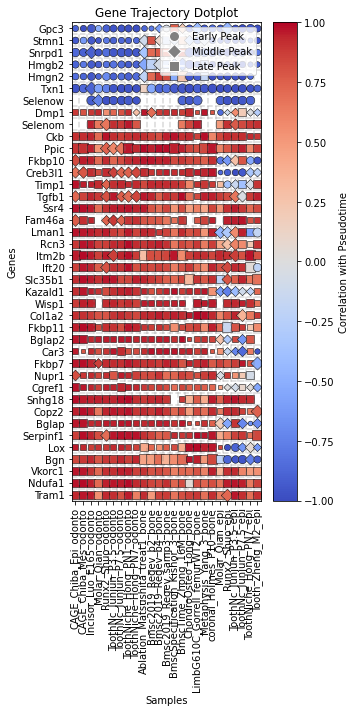

In [44]:
dottable = attributes.to_dot_table(genes = gene_cluster_sub["gene"][::-1])
fig = plot_trajectory_dotplot(dottable,dot_scale=100,col_spacing = 0.5, save_path="../../../results/trajectory/20250415_trajdtw_fit/20250418_mineralization_dotplot.pdf")


In [118]:
def plot_trajectory_dotplot2(
    dot_table: pd.DataFrame,
    col_split: Optional[Union[int, List, pd.Series, pd.DataFrame]] = None,
    row_split: Optional[Union[int, List, pd.Series, pd.DataFrame]] = None,
    figsize: Tuple[int, int] = (10, 10),
    dot_scale: float = 100,
    col_spacing: float = 1.0,
    dot_width: float = 0.45,
    subplot_spacing: float = 0.2,
    colormap: str = "coolwarm",
    show_rownames: bool = True,
    show_colnames: bool = True,
    grid: bool = True,
    save_path: Optional[Union[str, Path]] = None
) -> Figure:
    """
    Create a dotplot visualization of trajectory attributes with support for splitting by rows and columns.
    
    Parameters
    ----------
    dot_table : pd.DataFrame
        DataFrame with columns Gene, Sample, Correlation, Expression, and Peak
    col_split : int, list, Series, or DataFrame, optional
        How to group the columns (samples):
        - If int: Split into that many evenly sized groups
        - If list: List of category labels for each sample in the order they appear
        - If Series/DataFrame: Grouping information where index corresponds to sample names
          and values are group identifiers
    row_split : int, list, Series, or DataFrame, optional
        How to group the rows (genes):
        - If int: Split into that many evenly sized groups
        - If list: List of category labels for each gene in the order they appear
        - If Series/DataFrame: Grouping information where index corresponds to gene names
          and values are group identifiers
    figsize : tuple, default=(10, 10)
        Base figure size in inches (width, height) for a single subplot. The actual figure size 
        will be scaled based on the number of row and column groups and col_spacing.
    dot_scale : float, default=100
        Scale factor for dot sizes
    col_spacing : float, default=1.0
        Spacing between dots (columns) in the dotplot. Higher values increase spacing.
    dot_width : float, default=0.45
        Width of each dot in inches. Controls the physical width of each subplot to ensure 
        consistent dot widths across all subplots regardless of the number of samples.
    subplot_spacing : float, default=0.2
        Spacing between subplots as a fraction of the subplot size.
    colormap : str, default="coolwarm"
        Matplotlib colormap name for correlation values
    show_rownames : bool, default=True
        Whether to show gene names on the y-axis. When col_split is used, row names will only 
        be shown in the leftmost box of each row.
    show_colnames : bool, default=True
        Whether to show sample names on the x-axis
    grid : bool, default=True
        Whether to show grid lines
    save_path : str or Path, optional
        Path to save the figure. If None, the figure is not saved.
        
    Returns
    -------
    matplotlib.figure.Figure
        The figure object
    """
    # Get unique genes and samples
    genes = dot_table['Gene'].unique()
    samples = dot_table['Sample'].unique()
    
    # Handle column grouping
    if col_split is not None:
        if isinstance(col_split, int):
            # Create n evenly sized groups of samples
            n_groups = col_split
            group_size = len(samples) // n_groups
            remainder = len(samples) % n_groups
            
            col_groups = {}
            start_idx = 0
            for i in range(n_groups):
                # Distribute remainder across groups
                group_len = group_size + (1 if i < remainder else 0)
                end_idx = start_idx + group_len
                col_groups[f'Group {i+1}'] = samples[start_idx:end_idx]
                start_idx = end_idx
        elif isinstance(col_split, list):
            # Handle list input where each item corresponds to a sample in order
            if len(col_split) != len(samples):
                raise ValueError(f"Length of col_split list ({len(col_split)}) must match number of samples ({len(samples)})")
            
            # Create mapping from sample to category
            category_map = {sample: category for sample, category in zip(samples, col_split)}
            
            # Group samples by category
            col_groups = {}
            for category in sorted(set(col_split)):
                category_samples = [s for s, c in category_map.items() if c == category]
                if category_samples:
                    col_groups[category] = np.array(category_samples)
        elif isinstance(col_split, pd.Series):
            # Use Series for grouping where index matches sample names
            # Must align with sample names in the data
            aligned_col_split = {s: col_split.get(s, "Other") for s in samples}
            col_groups = {}
            for group in sorted(set(aligned_col_split.values())):
                group_samples = [s for s in samples if aligned_col_split[s] == group]
                if group_samples:  # Only include non-empty groups
                    col_groups[group] = np.array(group_samples)
        elif isinstance(col_split, pd.DataFrame):
            # Extract first column of DataFrame for grouping
            first_col = col_split.iloc[:, 0]
            aligned_col_split = {s: first_col.get(s, "Other") for s in samples}
            col_groups = {}
            for group in sorted(set(aligned_col_split.values())):
                group_samples = [s for s in samples if aligned_col_split[s] == group]
                if group_samples:  # Only include non-empty groups
                    col_groups[group] = np.array(group_samples)
        else:
            raise ValueError("col_split must be an int, list, pd.Series, or pd.DataFrame")
    else:
        # No column splitting
        col_groups = {'All Samples': samples}
    
    # Handle row grouping
    if row_split is not None:
        if isinstance(row_split, int):
            # Create n evenly sized groups of genes
            n_groups = row_split
            group_size = len(genes) // n_groups
            remainder = len(genes) % n_groups
            
            row_groups = {}
            start_idx = 0
            for i in range(n_groups):
                # Distribute remainder across groups
                group_len = group_size + (1 if i < remainder else 0)
                end_idx = start_idx + group_len
                row_groups[f'Group {i+1}'] = genes[start_idx:end_idx]
                start_idx = end_idx
        elif isinstance(row_split, list):
            # Handle list input where each item corresponds to a gene in order
            if len(row_split) != len(genes):
                raise ValueError(f"Length of row_split list ({len(row_split)}) must match number of genes ({len(genes)})")
            
            # Create mapping from gene to category
            category_map = {gene: category for gene, category in zip(genes, row_split)}
            
            # Group genes by category
            row_groups = {}
            for category in sorted(set(row_split)):
                category_genes = [g for g, c in category_map.items() if c == category]
                if category_genes:
                    row_groups[category] = np.array(category_genes)
        elif isinstance(row_split, pd.Series):
            # Use Series for grouping where index matches gene names
            aligned_row_split = {g: row_split.get(g, "Other") for g in genes}
            row_groups = {}
            for group in sorted(set(aligned_row_split.values())):
                group_genes = [g for g in genes if aligned_row_split[g] == group]
                if group_genes:  # Only include non-empty groups
                    row_groups[group] = np.array(group_genes)
        elif isinstance(row_split, pd.DataFrame):
            # Extract first column of DataFrame for grouping
            first_col = row_split.iloc[:, 0]
            aligned_row_split = {g: first_col.get(g, "Other") for g in genes}
            row_groups = {}
            for group in sorted(set(aligned_row_split.values())):
                group_genes = [g for g in genes if aligned_row_split[g] == group]
                if group_genes:  # Only include non-empty groups
                    row_groups[group] = np.array(group_genes)
        else:
            raise ValueError("row_split must be an int, list, pd.Series, or pd.DataFrame")
    else:
        # No row splitting
        row_groups = {'All Genes': genes}

    # Calculate subplot widths based on the actual number of samples in each group
    # This ensures each subplot's width is proportional to its sample count
    subplot_widths = {}
    for col_group_name, col_group_samples in col_groups.items():
        subplot_widths[col_group_name] = dot_width * len(col_group_samples) * col_spacing
    
    # Calculate total figure width based on sum of all subplot widths
    total_width = sum(subplot_widths.values()) * (1 + subplot_spacing)
    
    # Calculate heights based on original aspect ratio
    base_height = figsize[1]
    max_genes_per_group = max(len(group) for group in row_groups.values())
    subplot_height = base_height * (max_genes_per_group / len(genes))
    fig_height = subplot_height * len(row_groups) * (1 + subplot_spacing)
    
    # Create figure with calculated dimensions
    fig = plt.figure(figsize=(total_width, fig_height))
    
    # Create a GridSpec with width ratios proportional to the number of samples in each group
    width_ratios = [subplot_widths[col_group_name] for col_group_name in col_groups.keys()]
    gs = plt.GridSpec(
        len(row_groups), 
        len(col_groups), 
        figure=fig, 
        width_ratios=width_ratios
    )
    
    # Create the axes objects
    axes = np.empty((len(row_groups), len(col_groups)), dtype=object)
    
    for i, row_group_name in enumerate(row_groups.keys()):
        for j, col_group_name in enumerate(col_groups.keys()):
            # Create the subplot
            ax = fig.add_subplot(gs[i, j])
            axes[i, j] = ax
    
    # Define marker shapes for peak timing
    markers = {
        'Early': 'o',    # Circle for early peak
        'Middle': 'D',   # Diamond for middle peak
        'Late': 's',     # Square for late peak
        'None': 'x'      # X for no peak
    }
    
    # Define colormap for correlation
    cmap = plt.cm.get_cmap(colormap)
    
    # Plot each subplot
    for i, (row_group_name, row_group_genes) in enumerate(row_groups.items()):
        for j, (col_group_name, col_group_samples) in enumerate(col_groups.items()):
            ax = axes[i, j]
            
            # Filter data for this subplot
            subplot_data = dot_table[
                dot_table['Gene'].isin(row_group_genes) & 
                dot_table['Sample'].isin(col_group_samples)
            ]
            
            # Get unique genes and samples in this subplot
            subplot_genes = np.array([g for g in row_group_genes if g in subplot_data['Gene'].unique()])
            subplot_samples = np.array([s for s in col_group_samples if s in subplot_data['Sample'].unique()])
            
            if len(subplot_genes) == 0 or len(subplot_samples) == 0:
                # No data for this subplot - hide the axes
                ax.axis('off')
                continue
            
            # Create mapping from gene/sample name to position in this subplot
            gene_to_pos = {g: i for i, g in enumerate(subplot_genes)}
            sample_to_pos = {s: j for j, s in enumerate(subplot_samples)}
            
            # Plot data points for this subplot
            for _, row in subplot_data.iterrows():
                gene = row['Gene']
                sample = row['Sample']
                
                # Calculate positions
                y_pos = gene_to_pos[gene]
                x_pos = sample_to_pos[sample] * col_spacing
                
                correlation = row['Correlation']
                expression = row['Expression']
                peak = row['Peak']
                
                # Calculate marker size based on expression
                size = expression * dot_scale
                
                # Calculate color based on correlation
                color = cmap((correlation + 1) / 2)  # Map from [-1, 1] to [0, 1]
                
                # Get marker based on peak
                marker = markers.get(peak, 'o')
                
                # Plot the point
                ax.scatter(x_pos, y_pos, s=size, c=[color], marker=marker, edgecolors='black', linewidths=0.5)
            
            # Set titles and labels
            if i == 0:
                ax.set_title(col_group_name)
            
            if j == 0:
                ax.set_ylabel(row_group_name)
            
            # Set ticks and tick labels - only show row names in the leftmost box
            if show_rownames and j == 0:  # Only show in the leftmost box
                ax.set_yticks(range(len(subplot_genes)))
                ax.set_yticklabels(subplot_genes)
            else:
                ax.set_yticks([])
            
            if show_colnames:
                ax.set_xticks([j * col_spacing for j in range(len(subplot_samples))])
                ax.set_xticklabels(subplot_samples, rotation=90)
            else:
                ax.set_xticks([])
            
            # Create custom grid that respects column spacing
            if grid:
                # Turn off the default grid
                ax.grid(False)
                
                # Add vertical grid lines at positions between columns
                for k in range(len(subplot_samples) + 1):
                    x = (k - 0.5) * col_spacing
                    ax.axvline(x, linestyle='--', color='gray', alpha=0.3)
                
                # Add horizontal grid lines at positions between rows
                for k in range(len(subplot_genes) + 1):
                    y = k - 0.5
                    ax.axhline(y, linestyle='--', color='gray', alpha=0.3)
            
            # Set limits to ensure all points are visible
            ax.set_xlim(-0.5 * col_spacing, (len(subplot_samples) - 0.5) * col_spacing)
            ax.set_ylim(-0.5, len(subplot_genes) - 0.5)
    
    # Add shared legend for markers
    legend_elements = [
        plt.Line2D([0], [0], marker=markers['Early'], color='w', markerfacecolor='gray', 
                  markersize=10, label='Early Peak'),
        plt.Line2D([0], [0], marker=markers['Middle'], color='w', markerfacecolor='gray', 
                  markersize=10, label='Middle Peak'),
        plt.Line2D([0], [0], marker=markers['Late'], color='w', markerfacecolor='gray', 
                  markersize=10, label='Late Peak')
    ]
    
    # Add a common colorbar for the whole figure
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(-1, 1))
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=axes.ravel().tolist(), label='Correlation with Pseudotime', shrink=0.7)
    
    # Add legend to the figure
    fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.05), ncol=3)
    
    # Add overall title
    fig.suptitle('Gene Trajectory Dotplot', fontsize=16)
    
    # Adjust layout
    plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # Adjust rect to make room for the legend
    
    # Save figure if path provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    return fig

In [119]:
col_split

['1_odonto',
 '1_odonto',
 '1_odonto',
 '1_odonto',
 '1_odonto',
 '1_odonto',
 '1_odonto',
 '1_odonto',
 '1_odonto',
 '2_bone',
 '2_bone',
 '2_bone',
 '2_bone',
 '2_bone',
 '2_bone',
 '2_bone',
 '2_bone',
 '2_bone',
 '2_bone',
 '3_epi',
 '3_epi',
 '3_epi',
 '3_epi',
 '3_epi',
 '3_epi']

In [120]:
col_split  = ["1_odonto"] * 9 + ["2_bone"] * 10 + ["3_epi"] * 6


col_split_series = pd.DataFrame(col_split)
col_split_series.index = batch_names

/tmp/ipykernel_391648/4080104694.py:220: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap(colormap)
/tmp/ipykernel_391648/4080104694.py:332: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # Adjust rect to make room for the legend


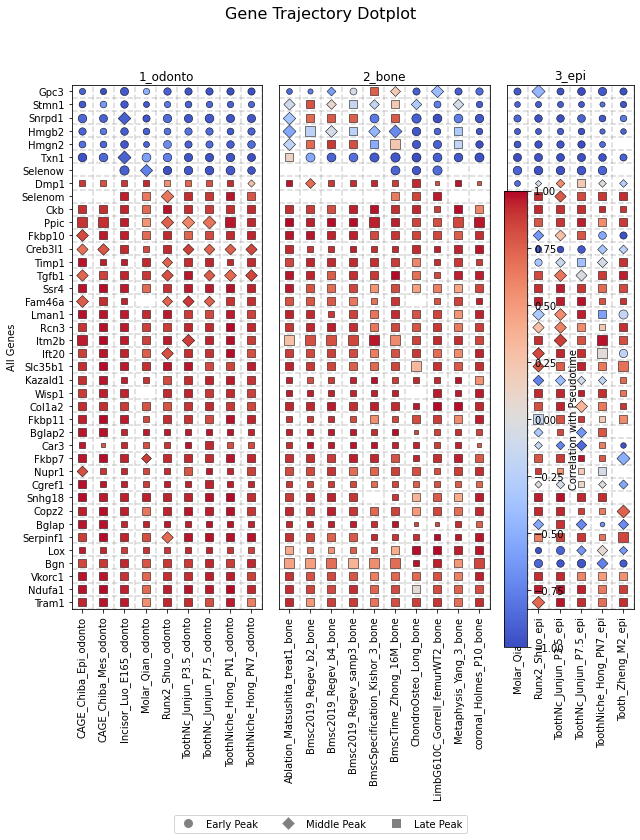

In [121]:
import matplotlib.pyplot as plt
fig = plot_trajectory_dotplot2(dottable,dot_scale=100,col_spacing = 1, col_split = col_split_series,dot_width = 0.3,
                               save_path="../../../results/trajectory/20250415_trajdtw_fit/20250418_mineralization_dotplot.pdf")


In [61]:
dottable.to_csv("../../../results/trajectory/20250415_trajdtw_fit/20250418_mineralization_dottable.csv")

In [30]:
batch_names

0                 CAGE_Chiba_Epi
1                 CAGE_Chiba_Mes
2               Incisor_Luo_E165
3                     Molar_Qian
4                     Runx2_Shuo
5            ToothNc_Junjun_P3.5
6            ToothNc_Junjun_P7.5
7            ToothNiche_Hong_PN1
8            ToothNiche_Hong_PN7
9     Ablation_Matsushita_treat1
10             Bmsc2019_Regev_b2
11             Bmsc2019_Regev_b4
12          Bmsc2019_Regev_samp3
13    BmscSpecification_Kishor_3
14            BmscTime_Zhong_16M
15             ChondroOsteo_Long
16    LimbG610C_Gorrell_femurWT2
17             Metaphysis_Yang_3
18            coronal_Holmes_P10
19                    Molar_Qian
20                    Runx2_Shuo
21           ToothNc_Junjun_P3.5
22           ToothNc_Junjun_P7.5
23           ToothNiche_Hong_PN7
24                Tooth_Zheng_M2
Name: 0, dtype: object

/home/gilberthan/anaconda3/lib/python3.9/site-packages/PyComplexHeatmap/dotHeatmap.py:360: FutureWarning: The provided callable <function mean at 0x76fe18375e50> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  data2d = data.pivot_table(
/home/gilberthan/anaconda3/lib/python3.9/site-packages/PyComplexHeatmap/dotHeatmap.py:379: FutureWarning: The provided callable <function mean at 0x76fe18375e50> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  self.kwargs["s"] = data.pivot_table(
/home/gilberthan/anaconda3/lib/python3.9/site-packages/PyComplexHeatmap/dotHeatmap.py:395: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.kwargs["s"]=self.kwargs["s"].applymap(lambda x:(x-self.smin)/delta)
/home/gilb

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Using user provided max_s: 60
Plotting legends..
Estimated legend width: 25.930555555555557 mm


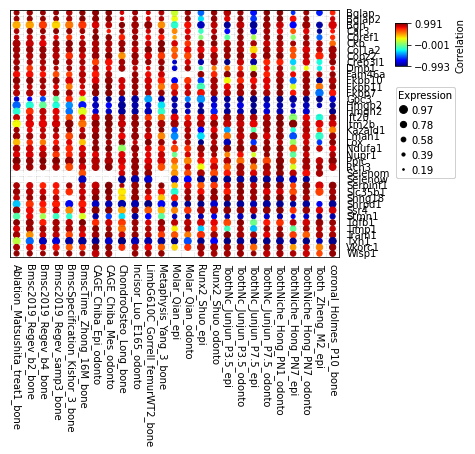

In [ ]:
import PyComplexHeatmap as pch
cm = pch.DotClustermapPlotter(dottable,x='Sample',y='Gene',
                              value='Correlation',c='Correlation',s="Expression",
                               col_split=col_split,row_split = 3,
                               row_cluster =False,col_cluster =False,
                               row_dendrogram = False,
                                 ratio=60,show_rownames=True,
                                  spines=True,show_colnames=True)

In [ ]:
cm = pch.DotClustermapPlotter(dotDf,x='level_0',y='level_1',value='Coor',c='Coor',hue='Peak',s="Expr",
                               marker={'Start':'o','Middle':'D','End':'s'},row_dendrogram=False,ratio=40,
                              show_rownames=True,show_colnames=True,spines=True)